In [26]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

In [27]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

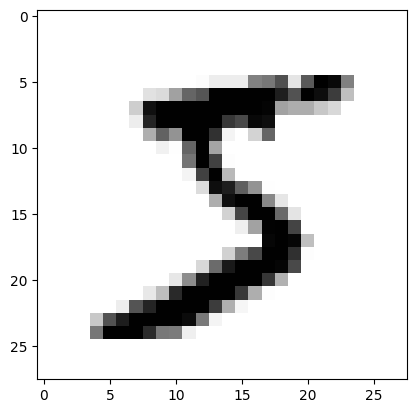

In [28]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

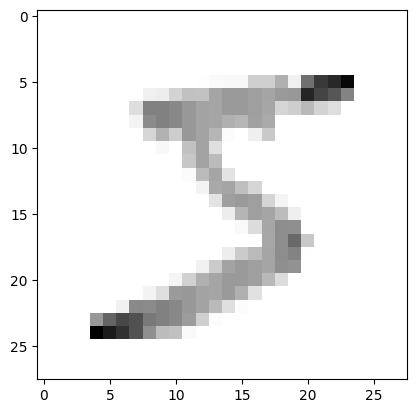

In [29]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [30]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2609 - accuracy: 0.9238 - val_loss: 0.1400 - val_accuracy: 0.9570
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1070 - accuracy: 0.9663 - val_loss: 0.1162 - val_accuracy: 0.9636
Epoch 3/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0731 - accuracy: 0.9770 - val_loss: 0.0890 - val_accuracy: 0.9713


In [32]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 834us/step - loss: 0.0890 - accuracy: 0.9713
0.08903869241476059 0.9713000059127808


In [33]:
model.save('num_pred.model')

INFO:tensorflow:Assets written to: num_pred.model\assets


INFO:tensorflow:Assets written to: num_pred.model\assets


In [34]:
new_model = tf.keras.models.load_model('num_pred.model')
print(new_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [35]:
predictions = new_model.predict([x_test])

313/313 [==============================] - 0s 811us/step


In [36]:
print(predictions)

[[2.12480114e-08 2.24566339e-08 1.50590949e-06 ... 9.99829412e-01
  3.17551695e-07 1.49209023e-04]
 [3.17504877e-11 1.18907865e-05 9.99986410e-01 ... 2.01517003e-09
  2.63536641e-08 3.08151833e-13]
 [4.01761810e-07 9.99920964e-01 8.65342372e-06 ... 2.02959582e-05
  3.14384124e-05 2.41978432e-06]
 ...
 [2.24855388e-08 1.18269136e-05 6.05353478e-07 ... 3.06422371e-05
  1.13193601e-05 1.00060040e-03]
 [4.81610596e-06 2.35314317e-07 1.65224549e-07 ... 7.20201569e-06
  1.01564021e-03 1.10823940e-07]
 [2.61827495e-07 9.55505630e-09 8.93668783e-08 ... 3.78487562e-12
  7.38818500e-08 1.04900877e-09]]


In [37]:
import numpy as np

print(np.argmax(predictions[1]))

2


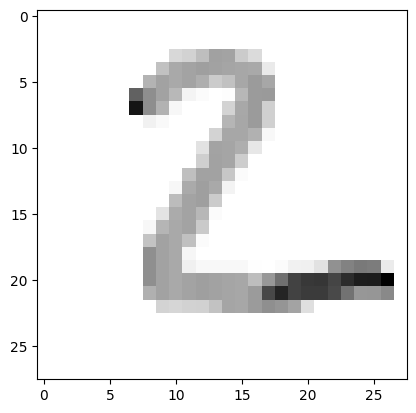

In [38]:
plt.imshow(x_test[1], cmap=plt.cm.binary)